# Estadística Aplicada
## Cinthya YeseniaLópez Díaz 1658003
### 2 mayo de 2023

In [1]:
#pronóstico de prueba
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
#modelo arma
from statsmodels.tsa.arima.model import ARIMA 

In [3]:
procesos = pd.read_excel('procesos_estacionariosG41.xlsx')

In [4]:
procesos

,ruido_blanco,ar_1,ma_1,arma_11
0,-0.416291,0.783709,1.583709,0.483709
1,-1.200566,-0.730341,0.591288,-1.178554
2,0.244522,-0.193683,1.644239,-0.850094
3,-0.099132,-0.215342,2.023129,-0.366749
4,0.148857,0.019652,2.099291,-0.062772
...,...,...,...,...
995,-0.670759,-0.892074,1.499536,-0.822315
996,1.052115,0.516871,2.716735,0.366817
997,-1.048340,-0.738217,1.477718,-0.388778
998,0.265279,-0.177651,1.741109,-0.402391


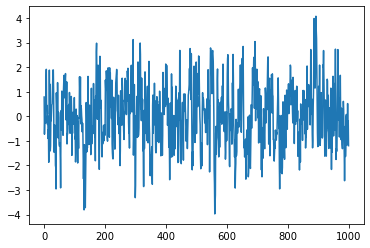

In [5]:
#lo primero siempre es gráficar la serie
procesos['ar_1'].plot();

La gráfica nos ayuda a hacernos una idea de si la serie se comporta como un proceso estacionario, y si la serie tiene algun componente de tendencia o estacional.

In [6]:
#verificar si la serie es estacionaria
adfuller_test1 = adfuller(procesos['ar_1'])
#nivel de significancia 0.05
alpha = 0.05
if adfuller_test1[1] < alpha:
    print('Se rechaza Ho, La serie es estacionaria')
else:
    print('No se rechaza Ho, la serie es No estacionaria')

Se rechaza Ho, La serie es estacionaria


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


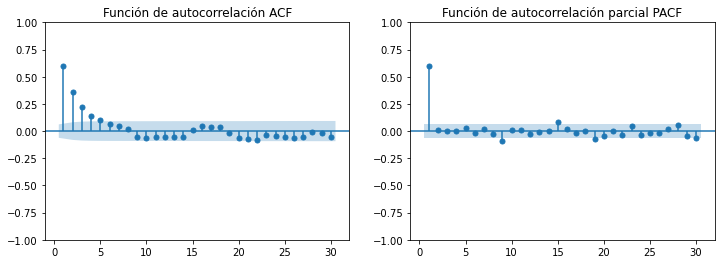

In [7]:
#Una vez que es estacionaria, debemos de identificar que tipo de proceso estacionario es
fig, ax = plt.subplots(1,2, figsize=(12,4))
#subgrafica 0
plot_acf(procesos['ar_1'], zero=False,ax=ax[0],title='Función de autocorrelación ACF')
ax[0].set_ylim(-1,1)
#subgrafica 1
plot_pacf(procesos['ar_1'], zero=False, ax=ax[1],title='Función de autocorrelación parcial PACF')
ax[1].set_ylim(-1,1)
plt.show()

**ACF te da el grado del MA(q)**
**PACF te da el grado del AR(p)**

Con base en las gráficas de ACF y PACF establecemos que el procesos es un AR(1)

In [9]:
#hemos aplicado cero veces primeras diferencias es de tipo I = 0
#estimar el modelo
# ARIMA(p,I,q) = (1,0,0)
modelo = ARIMA(procesos['ar_1'], order=(1,0,0))
resultado = modelo.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                   ar_1   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1416.067
Date:                Tue, 02 May 2023   AIC                           2838.134
Time:                        14:46:15   BIC                           2852.857
Sample:                             0   HQIC                          2843.730
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0260      0.078      0.332      0.740      -0.128       0.180
ar.L1          0.5978      0.024     24.638      0.000       0.550       0.645
sigma2         0.9938      0.046     21.466      0.0

El modelo estimado es $Y_t = 0.59 Y_{t-1} + \varepsilon_t $

Un modelo ARIMA(p,I,q) es un AR de orden p, con MA de orden q, y con un orden determinado de integración (I). El orden de integración es cuantas veces se le aplico primeras diferencias a la serie para volverla estacionaria.

In [ ]:
#Una vez que tenemos el modelo estimado podemos hacer pronósticos
